<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

# Data Gathering

In [185]:
df = pd.read_csv("car_dataset.csv")

# Data Preparation

In [186]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [188]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000,301.000,301.000,301.000,301.000
mean,2013.628,4.661,7.628,36947.206,0.043
std,2.892,5.083,8.644,38886.884,0.248
min,2003.000,0.100,0.320,500.000,0.000
25%,2012.000,0.900,1.200,15000.000,0.000
50%,2014.000,3.600,6.400,32000.000,0.000
75%,2016.000,6.000,9.900,48767.000,0.000
max,2018.000,35.000,92.600,500000.000,3.000


In [189]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [190]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
innova                        9
ciaz                          9
i20                           9
grand i10                     8
Royal Enfield Classic 350     7
jazz                          7
amaze                         7
sx4                           6
eon                           6
ertiga                        6
swift                         5
alto k10                      5
i10                           5
dzire                         4
Bajaj Pulsar 150              4
ritz                          4
etios liva                    4
wagon r                       4
Royal Enfield Thunder 350     4
Royal Enfield Thunder 500     3
creta                         3
Honda CB Hornet 160R          3
xcent                         3
Bajaj Pulsar NS 200           3
etios cross                   3
etios g                       3
Bajaj Av

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [191]:
df.shape

(301, 9)

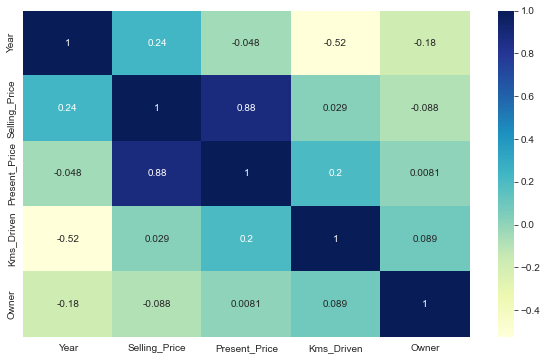

In [207]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [193]:
df_final = pd.get_dummies(df.drop('Car_Name', axis=1), drop_first=True)

In [194]:
df_final.shape

(301, 9)

In [195]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.350,5.590,27000,0,0,1,0,1
1,2013,4.750,9.540,43000,0,1,0,0,1
2,2017,7.250,9.850,6900,0,0,1,0,1
3,2011,2.850,4.150,5200,0,0,1,0,1
4,2014,4.600,6.870,42450,0,1,0,0,1


In [196]:
X = df_final.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler()

In [176]:
scaler.fit(X_train)

MinMaxScaler()

In [177]:
X_train_scaled = scaler.transform(X_train)

In [178]:
X_test_scaled = scaler.transform(X_test)

##  Model Building (Linear Regression)

In [199]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [200]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [201]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

# Interpret the model

In [202]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [203]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.897,0.607
mae,1.198,1.334
mse,3.059,3.779
rmse,1.749,1.944


# Model Evaluation

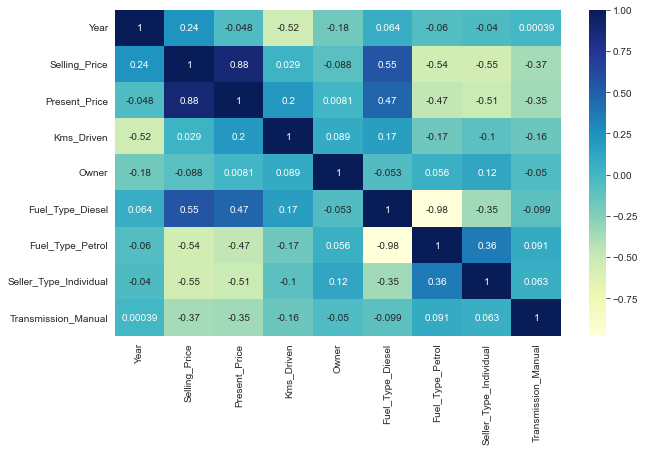

In [206]:
sns.heatmap(df_final.corr(), annot=True, cmap='YlGnBu');

In [95]:
from sklearn.model_selection import cross_validate, cross_val_score

In [96]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [97]:
scores

{'fit_time': array([0.00338674, 0.00126719, 0.00120902, 0.001158  , 0.00159574]),
 'score_time': array([0.00286317, 0.00263095, 0.00193906, 0.00185299, 0.00223207]),
 'test_r2': array([0.70565046, 0.85184459, 0.81974224, 0.57450156, 0.9436332 ]),
 'test_neg_mean_absolute_error': array([-1.19933904, -1.71526981, -1.23324076, -1.82604019, -1.00001375]),
 'test_neg_mean_squared_error': array([ -2.65287395,  -7.66524852,  -3.31581925, -15.8026026 ,
         -1.48352365]),
 'test_neg_root_mean_squared_error': array([-1.62876455, -2.76861852, -1.82093911, -3.97524875, -1.21799986])}

In [98]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003,0.003,0.706,-1.199,-2.653,-1.629
2,0.001,0.003,0.852,-1.715,-7.665,-2.769
3,0.001,0.002,0.820,-1.233,-3.316,-1.821
4,0.001,0.002,0.575,-1.826,-15.803,-3.975
5,0.002,0.002,0.944,-1.000,-1.484,-1.218


In [99]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.779
test_neg_mean_absolute_error       -1.395
test_neg_mean_squared_error        -6.184
test_neg_root_mean_squared_error   -2.282
dtype: float64

In [100]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.897,0.607
mae,1.198,1.334
mse,3.059,3.779
rmse,1.749,1.944


In [103]:
df_final.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [106]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"], index=X.columns)
lm_df

,lm_coef
Year,6.911
Present_Price,40.238
Kms_Driven,-2.004
Owner,0.821
Fuel_Type_Diesel,2.556
Fuel_Type_Petrol,0.494
Seller_Type_Individual,-1.231
Transmission_Manual,-1.797


# Regularization

# Ridge

In [107]:
from sklearn.linear_model import Ridge, RidgeCV

In [108]:
ridge_model = Ridge(alpha=1, random_state=101)

In [109]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=101)

In [110]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [111]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.842,0.584
mae,1.412,1.532
mse,4.709,3.993
rmse,2.170,1.998


In [112]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.897,0.607,0.842,0.584
mae,1.198,1.334,1.412,1.532
mse,3.059,3.779,4.709,3.993
rmse,1.749,1.944,2.170,1.998


In [115]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [116]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error", random_state=101)

In [117]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [118]:
ridge_cv_model.alpha_

0.23

In [119]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [120]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.891,0.617
mae,1.222,1.403
mse,3.257,3.679
rmse,1.805,1.918


In [121]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.897,0.607,0.842,0.584,0.891,0.617
mae,1.198,1.334,1.412,1.532,1.222,1.403
mse,3.059,3.779,4.709,3.993,3.257,3.679
rmse,1.749,1.944,2.170,1.998,1.805,1.918


In [126]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.23"], index=X.columns)

In [128]:
pd.concat([lm_df, rcm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23
Year,6.911,6.521
Present_Price,40.238,34.224
Kms_Driven,-2.004,-1.861
Owner,0.821,0.658
Fuel_Type_Diesel,2.556,2.825
Fuel_Type_Petrol,0.494,0.243
Seller_Type_Individual,-1.231,-1.663
Transmission_Manual,-1.797,-2.245


# Lasso

In [129]:
from sklearn.linear_model import Lasso, LassoCV

In [130]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [131]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [132]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.202,0.280
mae,3.179,2.242
mse,23.721,6.916
rmse,4.870,2.630


In [133]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.897,0.607,0.842,0.584,0.891,0.617,0.202,0.280
mae,1.198,1.334,1.412,1.532,1.222,1.403,3.179,2.242
mse,3.059,3.779,4.709,3.993,3.257,3.679,23.721,6.916
rmse,1.749,1.944,2.170,1.998,1.805,1.918,4.870,2.630


In [134]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=101)

In [135]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=101)

In [136]:
lasso_cv_model.alpha_

0.03

In [137]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [138]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.891,0.682
mae,1.201,1.288
mse,3.248,3.057
rmse,1.802,1.748


In [139]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.897,0.607,0.842,0.584,0.891,0.617,0.202,0.280,0.891,0.682
mae,1.198,1.334,1.412,1.532,1.222,1.403,3.179,2.242,1.201,1.288
mse,3.059,3.779,4.709,3.993,3.257,3.679,23.721,6.916,3.248,3.057
rmse,1.749,1.944,2.170,1.998,1.805,1.918,4.870,2.630,1.802,1.748


In [140]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.03"], index=X.columns)

In [141]:
pd.concat([lm_df, rcm_df, lcm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23,lasso_cv_coef_0.03
Year,6.911,6.521,6.250
Present_Price,40.238,34.224,35.724
Kms_Driven,-2.004,-1.861,-0.000
Owner,0.821,0.658,0.000
Fuel_Type_Diesel,2.556,2.825,2.311
Fuel_Type_Petrol,0.494,0.243,-0.000
Seller_Type_Individual,-1.231,-1.663,-1.413
Transmission_Manual,-1.797,-2.245,-1.843


## Elastic-Net 

In [145]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [146]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=101)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=101)

In [147]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [148]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.230,0.260
mae,3.152,2.256
mse,22.913,7.106
rmse,4.787,2.666


In [149]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.897,0.607,0.842,0.584,0.891,0.617,0.202,0.280,0.891,0.682,0.230,0.260
mae,1.198,1.334,1.412,1.532,1.222,1.403,3.179,2.242,1.201,1.288,3.152,2.256
mse,3.059,3.779,4.709,3.993,3.257,3.679,23.721,6.916,3.248,3.057,22.913,7.106
rmse,1.749,1.944,2.170,1.998,1.805,1.918,4.870,2.630,1.802,1.748,4.787,2.666


In [150]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=101)

In [151]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=101)

In [152]:
elastic_cv_model.alpha_

0.03

In [153]:
elastic_cv_model.l1_ratio_

1.0

In [154]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [155]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.891,0.682
mae,1.201,1.288
mse,3.248,3.057
rmse,1.802,1.748


In [156]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.897,0.607,0.842,0.584,0.891,0.617,0.202,0.280,0.891,0.682,0.230,0.260,0.891,0.682
mae,1.198,1.334,1.412,1.532,1.222,1.403,3.179,2.242,1.201,1.288,3.152,2.256,1.201,1.288
mse,3.059,3.779,4.709,3.993,3.257,3.679,23.721,6.916,3.248,3.057,22.913,7.106,3.248,3.057
rmse,1.749,1.944,2.170,1.998,1.805,1.918,4.870,2.630,1.802,1.748,4.787,2.666,1.802,1.748


In [157]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.03, l1:1)"], index=X.columns)

In [158]:
pd.concat([lm_df, rcm_df, lcm_df, ecm_df], axis = 1)

,lm_coef,ridge_cv_coef_0.23,lasso_cv_coef_0.03,"elastic_coef_(alp:0.03, l1:1)"
Year,6.911,6.521,6.250,6.250
Present_Price,40.238,34.224,35.724,35.724
Kms_Driven,-2.004,-1.861,-0.000,-0.000
Owner,0.821,0.658,0.000,0.000
Fuel_Type_Diesel,2.556,2.825,2.311,2.311
Fuel_Type_Petrol,0.494,0.243,-0.000,-0.000
Seller_Type_Individual,-1.231,-1.663,-1.413,-1.413
Transmission_Manual,-1.797,-2.245,-1.843,-1.843
